<a href="https://colab.research.google.com/github/Honaht01/PDA_sol/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Выполнил: Григорьев П.К.

Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [134]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
from google.colab import files

files.upload()

In [4]:
df = pd.read_csv('bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [6]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак (количество прокатов (cnt)) зависит от остальных признаков `df.columns[:-1]`.

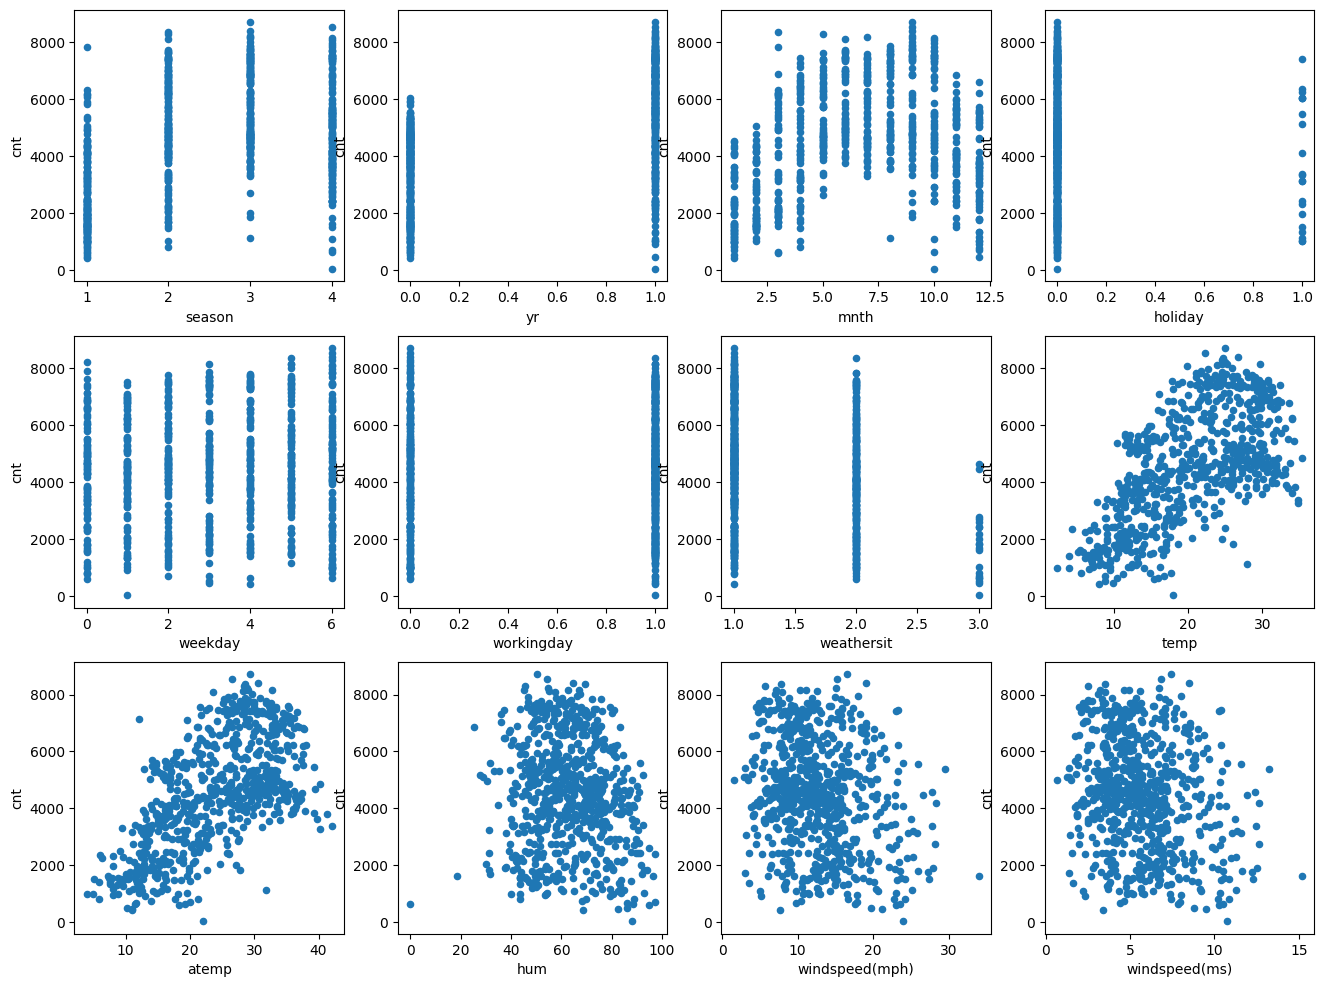

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: наблюдается явная сезонная зависимость, в холодные месяцы число прокатов заметно снижается.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью l**m**plot.

ответ: температура и температура по ощущениям (чем выше, тем больше количество прокатов), скорость ветра (чем меньше, тем больше количество прокатов).


Зависимость от температуры видна наглядно, а зависимость от скорости ветра лучше проверить:

Text(15.875000000000009, 0.5, 'Прокаты')

<Figure size 1500x1000 with 0 Axes>

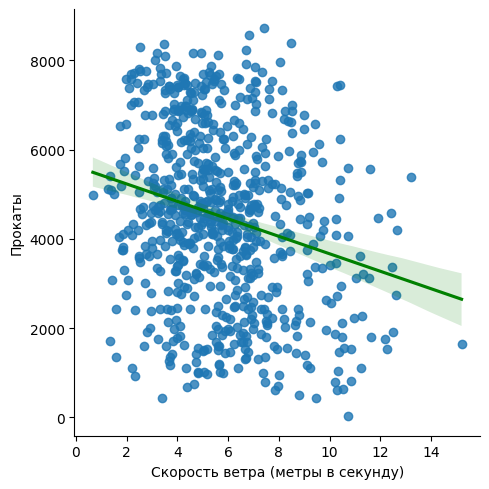

In [120]:
plt.figure(figsize=(15, 10))
sns.lmplot(x='windspeed(ms)', y='cnt', data=df, line_kws={'color': 'green'})
plt.xlabel('Скорость ветра (метры в секунду)')
plt.ylabel('Прокаты')

Зависимость действительно линейная, но есть разброс.

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ:

Меньше всего: holiday, weekday, workingday, windspeed (mph/ms)

Больше всего: season, yr, temp, atemp

Text(0.5, 1.0, 'Тепловая карта корреляционной матрицы')

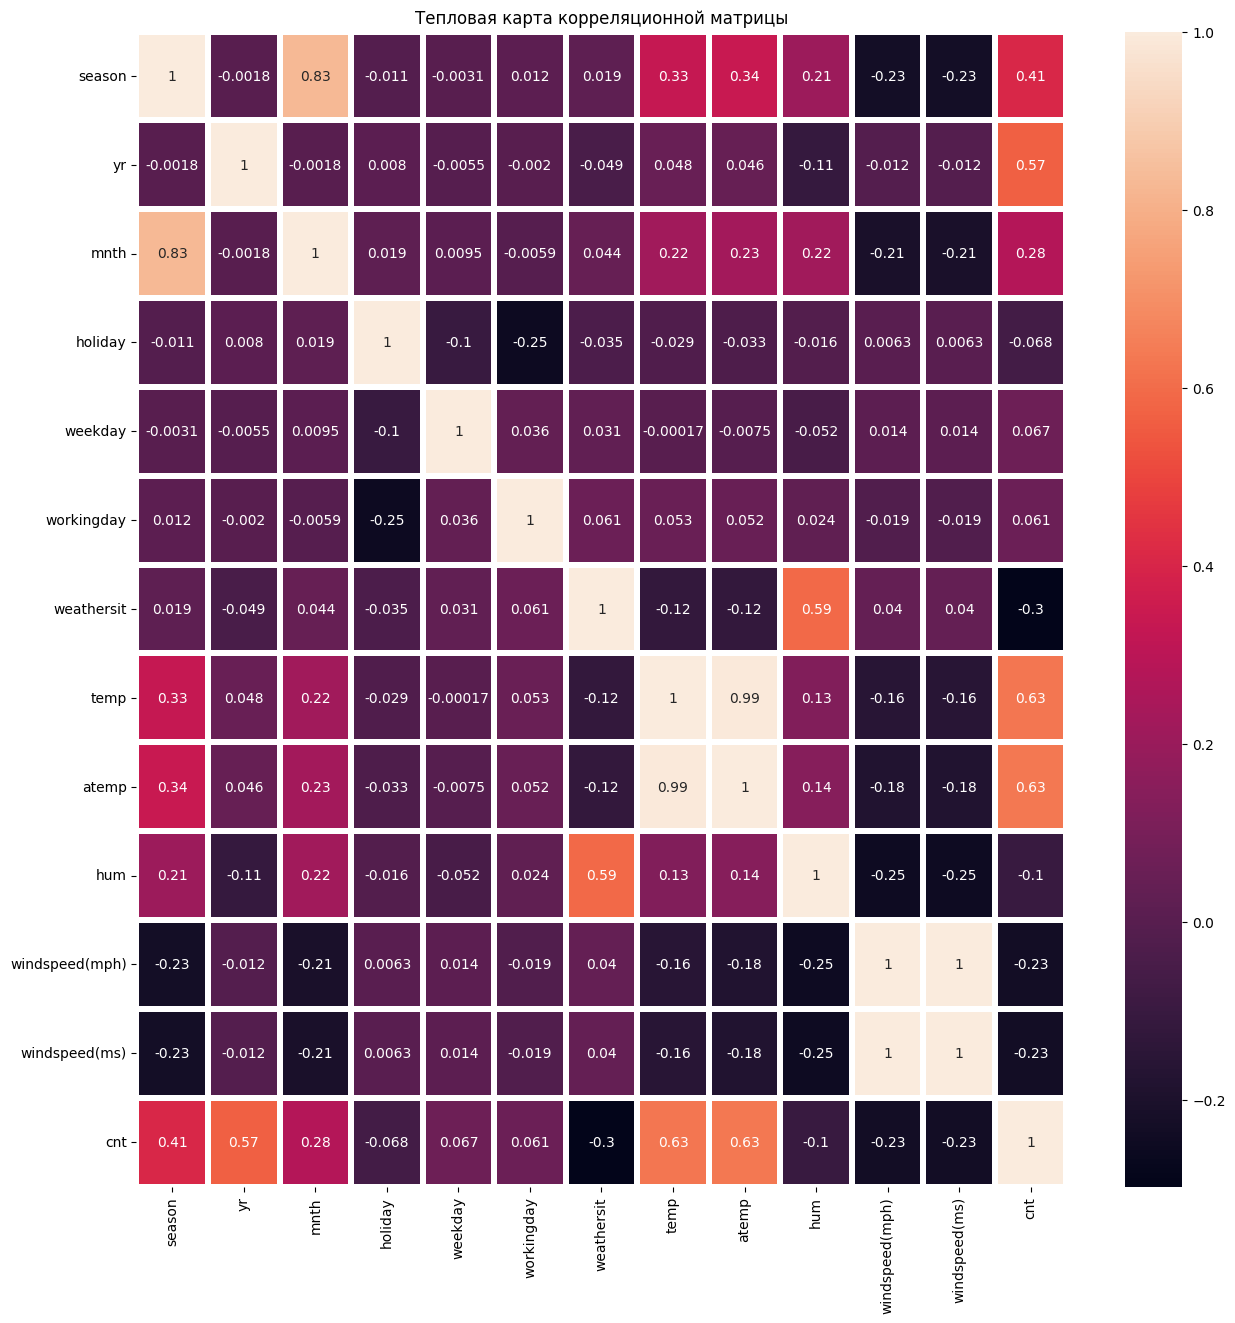

In [128]:
cormatr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cormatr, annot=True, linewidths=3)
plt.title("Тепловая карта корреляционной матрицы")

Ответ:

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: вероятно, прокат велосипедов стал популярне со временем, так клиенты начали рассказывать о нем своим знакомым или была проведена рекламная компания.

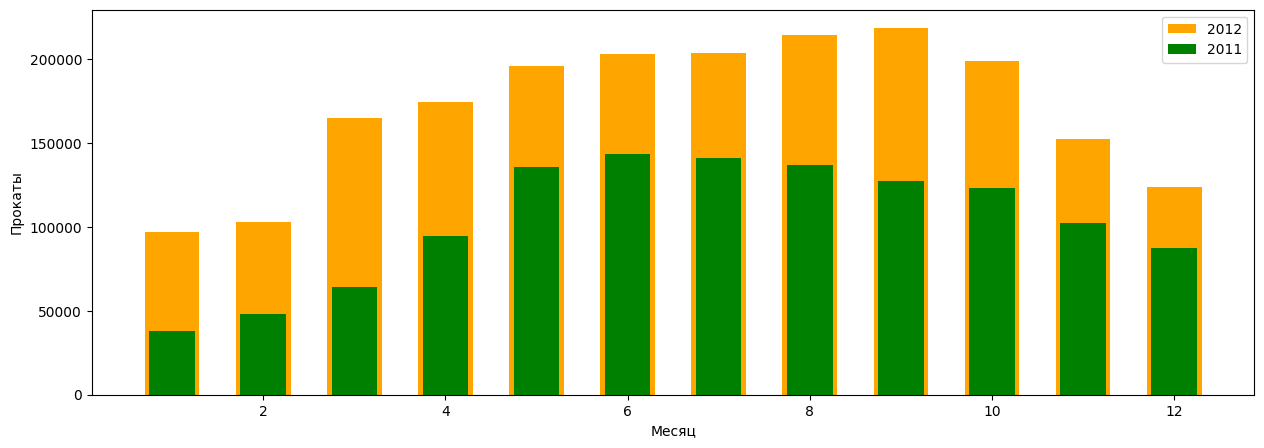

In [132]:
rentmonth = df.groupby(['yr', 'mnth'])['cnt'].sum()
rent11 = rentmonth[0]
rent12 = rentmonth[1]
month = range(1, 13)
plt.figure(figsize=(15, 5))

plt.bar(month, rent12, width=0.6, label='2012', color='orange')
plt.bar(month, rent11, width=0.5, label='2011', color='green')
plt.xlabel('Месяц')
plt.ylabel('Прокаты')
plt.legend()

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: возможно, сбор данных проводился в популярном месте с большим притоком отдыхающих и туристов, так распределение по дням недели является достаточно равномерным.

Ответ: распределение называется равномерным

Text(0, 0.5, 'Прокаты')

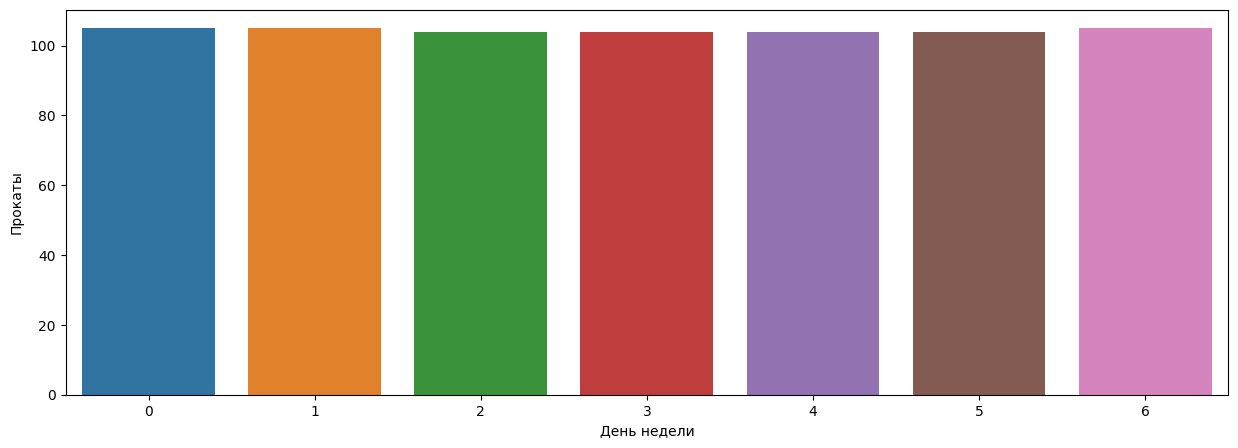

In [77]:
plt.figure(figsize=(15, 5))
sns.countplot(x='weekday', data = df)
plt.xlabel('День недели')
plt.ylabel('Прокаты')

Text(0, 0.5, 'Прокаты')

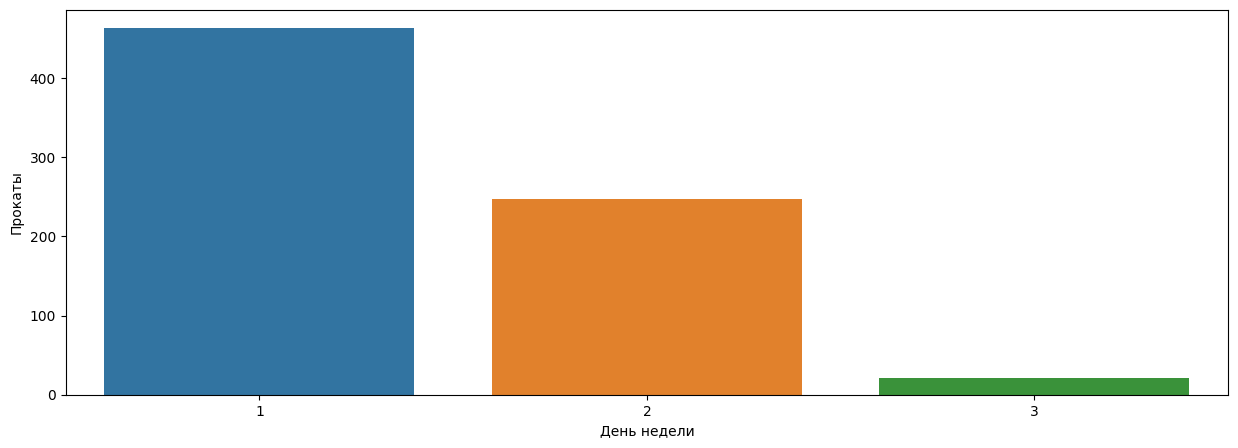

In [78]:
plt.figure(figsize=(15, 5))
sns.countplot(x='weathersit', data = df)
plt.xlabel('День недели')
plt.ylabel('Прокаты')

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: 4500

Ответ: нормальное распределение

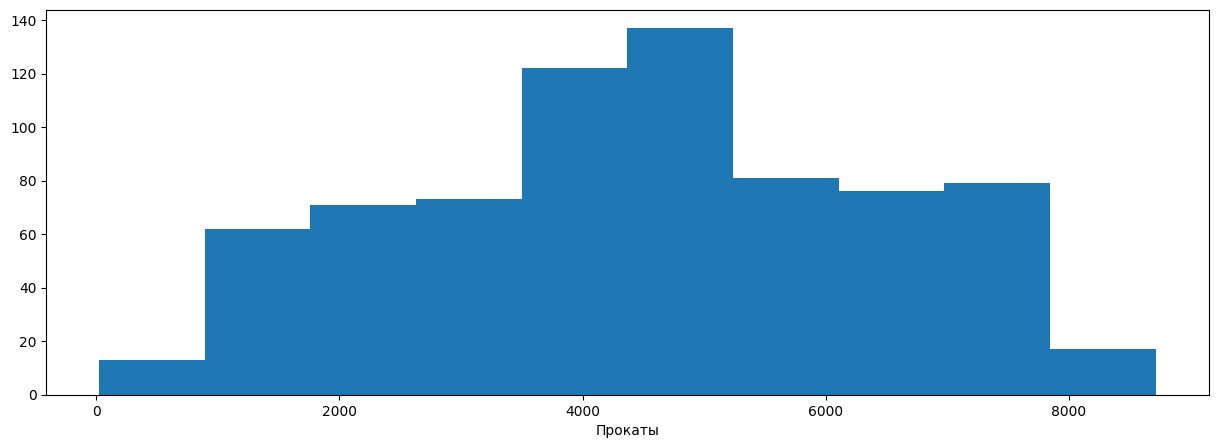

In [133]:
fig = px.scatter(df, x="cnt")
fig.show()

plt.figure(figsize=(15, 5))
plt.hist(df['cnt'])
plt.xlabel('Прокаты')
plt.show()


## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: в среднем, температура ощущается теплее, чем есть на самом деле. Максимальная реальная температура достигала 35.3 градусов (второй график), но температура по ощущениям доходила вплоть до 42 (третий график).

Возможно, в месте сбора данных достаточно теплый климат с низкой влажностью воздуха.

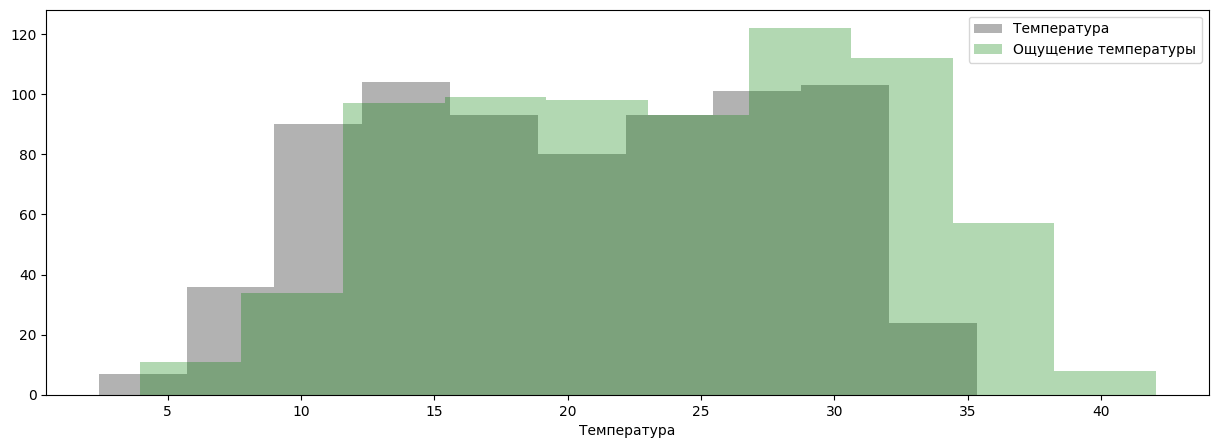

In [144]:
plt.figure(figsize=(15, 5))
plt.hist(df['temp'],  label = 'Температура', color = 'black', alpha=0.3)
plt.hist(df['atemp'], label='Ощущение температуры', color = 'green', alpha=0.3)
plt.xlabel('Температура')
plt.legend()
plt.show()

fig = px.scatter(df, x="temp")
fig.show()

fig = px.scatter(df, x="atemp")
fig.show()

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: возможно, люди предпочитают брать велосипеды в прокат в выходные дни (но их гораздо меньше, чем рабочих), а в некоторые месяцы пропорция выходных дней к рабочим больше, чем в другие.

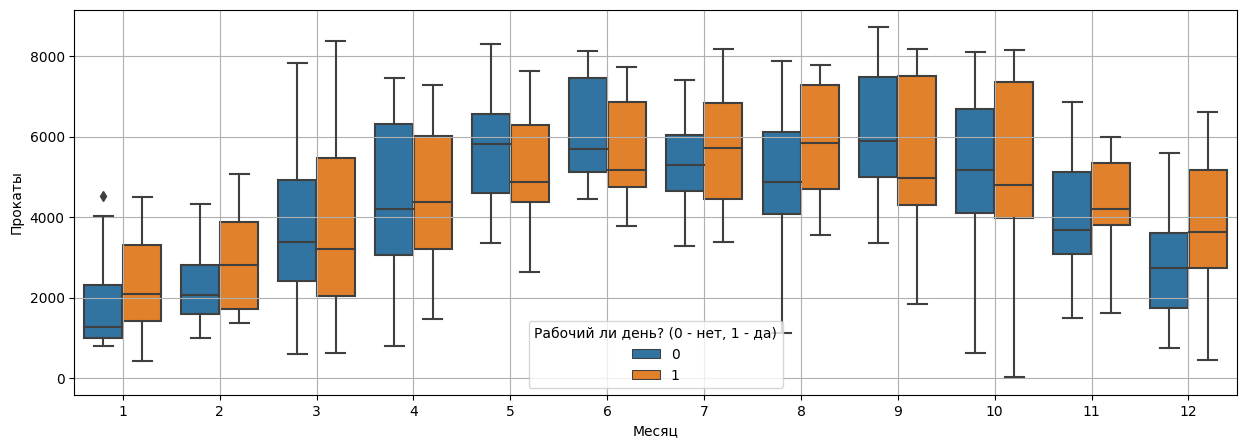

In [145]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='mnth', y='cnt', hue='workingday')
plt.xlabel('Месяц')
plt.ylabel('Прокаты')
plt.grid(True)
plt.legend(title='Рабочий ли день? (0 - нет, 1 - да)')

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: вопрос спорный, так как ветер может быть как холодным, так и теплым.

Для решения задачи построим диаграмму рассеяния, учитывающую температуру (реальную), температуру по ощущениям (в качестве параметра color) и скорость ветра.

**(Дальнейшие рассуждения под диаграммой)**

In [164]:
fig = px.scatter(df, x="temp", y="windspeed(ms)", color='atemp',
labels={"temp": "Температура","windspeed(ms)": "Скорость ветра (м/с)","atemp": "Температура по ощущениям"})
fig.show()

После построения диаграммы исследуем полученные точки.

Например:
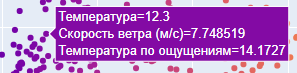

При рассмотрении подавляющего большинства точек можно понять, что температура по ощущениям практически всегда выше, чем реальная температура. Причем это актуально как для дней с самой низкой скоростью ветра, так и с самой высокой; как для самых холодных дней, так и самых теплых.

**Ответ на изначальный вопрос:** нет, не правда.